# Fluxes
Download data from
https://github.com/BlackHolePerturbationToolkit/CircularOrbitSelfForceData

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from few.utils.utility import CubicSpline

def Omega_phi_eqpro(r, a):
        return(1./(np.sqrt(r*r*r) + a))

def EdotPN(r,a):
    y = np.power(Omega_phi_eqpro(r,a),2./3.)
    res = 6.4*np.power(y,5) #- 23.752380952380953*np.power(y,6) + 1.6*(50.26548245743669 - 11.*a)*np.power(y,6.5) + (-31.54215167548501 + 13.2*np.power(a,2))*np.power(y,7) + 0.009523809523809525*(-25732.785425553997 - 2646.*a - 504.*np.power(a,3))*np.power(y,7.5) + \
   #(-649.6614141423464 + 260.32427983539094*a + 163.36281798666926*np.power(a,2) - 32.13333333333333*np.power(a,3))*np.power(y,8.5) + np.power(y,8)*(740.6829867239124 - 217.8170906488923*a + 7.758730158730159*np.power(a,2) - 52.17523809523809*np.log(y)) #+\
       #np.power(y,9)*(-748.828100625135 - 515.5802343491364*a + 69.31499118165785*np.power(a,2) + 5.2*np.power(a,4) + 3.2*np.sqrt(1. - 1.*np.power(a,2)) + 41.6*np.power(a,2)*np.sqrt(1. - 1.*np.power(a,2)) + 19.2*np.power(a,4)*np.sqrt(1. - 1.*np.power(a,2)) + 12.8*(a + 3.*np.power(a,3)) + 168.77786848072563*np.log(y))

    return res

def isco_pro(a):
      Z1 = 1. + (np.power(1. + a, 1./3.) + np.power(1. - a, 1./3.)) * np.power((1. + a)*(1. - a), 1./3.)
      Z2 = np.sqrt(3.*a*a + Z1*Z1)

      return(3. + Z2 - np.sqrt((3. - Z1)*(3. + Z1 + 2.*Z2)))


def isco_kerr(a):
    isc = 3 + np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2)) - \
   np.sqrt((2 - np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)))*\
     (4 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)) + \
       2*np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2))))
    return isc


In [3]:
radius = np.loadtxt('./flux_circ_tensor.dat')[:,0]
a_array= np.loadtxt('./flux_circ_tensor.dat')[:,1]
u_array =np.round( np.log( radius - isco_pro(a_array) +3.9),decimals=8)
flux_data = np.loadtxt('./flux_circ_tensor.dat')[:,2]
flux_scalar = np.loadtxt('./flux_circ_scalar.dat')[:,2]

In [19]:
print(len(np.unique(u_array)))
ind = len(np.unique(u_array))

86


In [20]:
u_array[0]-u_array[ind]

0.0

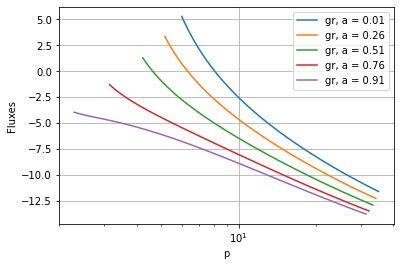

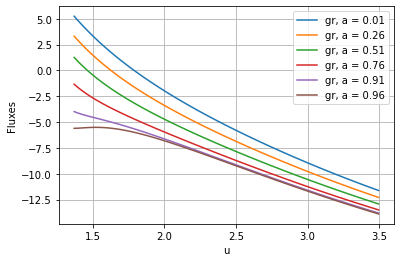

In [21]:
radius = np.loadtxt('./flux_circ_tensor.dat')[:,0]
a_array= np.loadtxt('./flux_circ_tensor.dat')[:,1]
u_array =np.round( np.log( radius - isco_pro(a_array) +3.9),decimals=8)
flux_data = np.loadtxt('./flux_circ_tensor.dat')[:,2]

plt.figure()
for i in [0, 25, 50, 75, 90]:
    rr = radius[ind*i:ind*(i+1)]
    fl_gr = flux_data[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.semilogx(rr, (fl_gr-EdotPN(rr, uniq_a[i] ))/np.power(y, 6), '-', label=f'gr, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes')
plt.xlabel('p')
plt.legend()
plt.grid()

plt.figure()
for i in [0, 25, 50, 75, 90, 95]:
    rr = radius[ind*i:ind*(i+1)]
    fl_gr = flux_data[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.plot(u_array[ind*i:ind*(i+1)] , (fl_gr-EdotPN(rr, uniq_a[i] ))/np.power(y, 6), '-', label=f'gr, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes')
plt.xlabel('u')
plt.legend()
plt.grid()

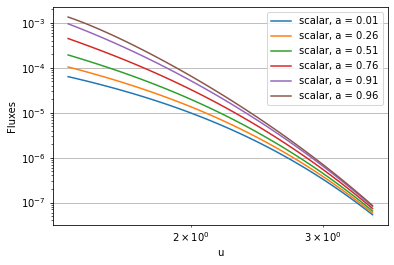

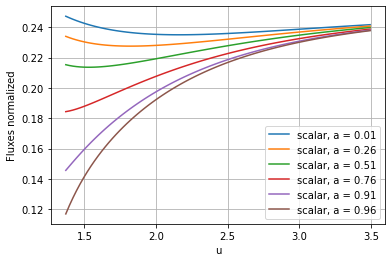

In [33]:
radius_scalar = np.loadtxt('./flux_circ_scalar.dat')[:,0]
a_array_scalar= np.loadtxt('./flux_circ_scalar.dat')[:,1]
u_array =np.round( np.log( radius - isco_pro(a_array) +3.9),decimals=8)
flux_scalar = np.loadtxt('./flux_circ_scalar.dat')[:,2]

plt.figure()
for i in [0, 25, 50, 75, 90, 95]:
    rr = radius[ind*i:ind*(i+1)]
    fl = flux_scalar[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.loglog(u_array[ind*i:ind*(i+1)] , fl, '-', label=f'scalar, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes')
plt.xlabel('u')
plt.legend()
plt.grid()

plt.figure()
for i in [0, 25, 50, 75, 90, 95]:
    rr = radius[ind*i:ind*(i+1)]
    fl = flux_scalar[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.plot(u_array[ind*i:ind*(i+1)] , fl/(np.power(y, 4)/3), '-', label=f'scalar, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes normalized')
plt.xlabel('u')
plt.legend()
plt.grid()


In [26]:
print(radius_scalar-radius)
print(a_array-a_array_scalar)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


## Total Flux

In [28]:
with open('./FluxesEdot_scalar_tensor_1PNnormalized.dat', 'w') as f:
    for j in range(len(a_array)):
        # PN normalization
        y = np.power(Omega_phi_eqpro(radius[j], a_array[j]),2./3.)
        fact_gr = np.power(y, 6)
        Ed = EdotPN(radius[j], a_array[j] )
        flux_gr_norm = (flux_data[j] - Ed)/fact_gr
        
        fact_sc = np.power(y, 4)/3
        flux_sc_norm = flux_scalar[j]/fact_sc

        f.write( str(flux_sc_norm)+'\t' +str(flux_gr_norm)+'\t' +  str(u_array[j] )+'\t' + str(a_array[j]) )
        f.write('\n')
    f.close()